In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
print(df.shape)
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

In [3]:
pd.isna(df).sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
# Dropping certain columns

df1=df.drop(['area_type','availability','society'],axis=1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
pd.isna(df1).sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Replacing null values with Median and dropping

In [6]:
df1.bath.fillna(df1.bath.median(),inplace=True)

In [7]:
pd.isna(df1.bath).sum()

0

In [8]:
df1.balcony.fillna(df1.balcony.median(),inplace=True)
pd.isna(df1.balcony).sum()

0

In [9]:
df1=df1.dropna()

In [10]:
pd.isna(df1).sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

### Rectifying the 'size' column

In [11]:
df1['BHK']=df1['size'].apply(lambda x: x.split(' ')[0])

In [12]:
df1.drop('size',axis=1,inplace=True)
df1.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


### Rectifying the 'total_sqft' column

In [13]:
## Removing discrepancies in 'total_sqft' 

df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
## Take average of range and ignore others

def convert_range_to_num(x):
    lis= x.split('-')
    if len(lis)==2:
        return ((float(lis[0])+float(lis[1]))/2)
    try:
        return float(x)
    except:
        return None
    

In [15]:
df2=df1.copy()

df2.total_sqft=df2['total_sqft'].apply(convert_range_to_num)
df2.head(20)

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,2.0,370.00,6


In [16]:
df1.dtypes

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
BHK            object
dtype: object

## Feature Engineering

In [17]:
## Using "other" in the 'location' column

In [18]:
loc_no=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [19]:
len(loc_no[loc_no<= 10])

1063

In [20]:
loc_less_than10 = loc_no[loc_no<10]

In [21]:
df2['location']= df2.location.apply(lambda x: 'other' if x in loc_less_than10 else x)



In [22]:
print(len(df2[df2['location']=='other']))
print(len(df2.location.unique()))

2777
254


In [23]:
df2.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
BHK            object
dtype: object

In [24]:
df2.total_sqft= df2.total_sqft
df2['price_per_sqft']=(df2['price']*100000)/df2['total_sqft']

df2.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [25]:
## Remove outliers

df2=df2.astype({'BHK':float})
df3= df2[~(df2.total_sqft/df2.BHK <250)]

df3.shape

(12691, 7)

In [26]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

total_sqft         587.000000
bath                 1.000000
balcony              1.000000
price               67.935000
BHK                  1.000000
price_per_sqft    2749.870864
dtype: float64


In [28]:
df4= df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
df4.shape

(10581, 7)

(array([ 715., 6735., 2740.,  391.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <a list of 4 Patch objects>)

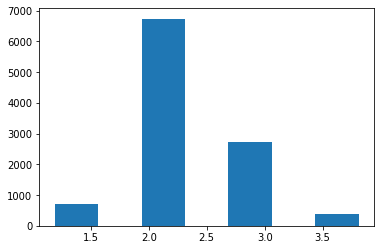

In [29]:
plt.hist(df4.bath,bins=len(df4.bath.unique()),rwidth=0.5)

In [30]:
df4[df4['bath']>df4['BHK']+1]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft


In [31]:
## dummies for location column


In [32]:
dummies=pd.get_dummies(df4.location,drop_first=True)

In [33]:
df5=pd.concat([df4,dummies],axis=1)

In [34]:
df5.drop(['price_per_sqft','other'],axis=1,inplace=True)

In [35]:
df5.head()

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,1170.0,2.0,1.0,38.00,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
df5=df5.drop('location',axis=1)

In [37]:
pd.isna(df5).sum()
df5.dropna(inplace=True)

In [38]:
df5.head(1)

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X= df5.drop('price',axis=1)
Y= df5['price']
X.head(6)

,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1310.0,3.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Data Splitting

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.6843727187684288

In [44]:
## K-fold cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y, cv=cv)

array([ 7.05531975e-01,  7.04625289e-01, -2.29320720e+11,  6.53668823e-01,
       -1.70422757e+15])

In [46]:
from sklearn.linear_model import Lasso
lasso=Lasso()

lasso.fit(X_train,Y_train)
lasso.score(X_test,Y_test)

0.5974190579117176

In [48]:
## K-fold cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(Lasso(),X,Y, cv=cv)

array([0.62031524, 0.64226792, 0.59725154, 0.57054021, 0.61436577])

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dtr.fit(X_train,Y_train)
dtr.score(X_test,Y_test)

0.5192896440907294

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(DecisionTreeRegressor(),X,Y, cv=cv)

array([0.56419945, 0.54048643, 0.5531154 , 0.54647142, 0.5373284 ])

In [ ]:
X.head(1)

In [61]:
np.where(X.columns == '1st Block Koramangala')[0][0]

5

In [67]:
# Prediction

def prediction(location,balcony,sqft,bath,BHK):
    idx = np.where(X.columns == location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= balcony
    x[3]= BHK
    x[idx]=1
    
    return lr.predict([x])
    


In [70]:
prediction('1st Phase JP Nagar',1,1000,2,2)[0]

89.73957701584601

In [71]:
import pickle

with open('priceprediction_pkl.pickle','wb') as f:
    pickle.dump(lr,f)